In [2]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt



In [3]:
    #load the data 
    from google.colab import files #Only use for Google Colab
    uploaded = files.upload()      #Only use for Google Colab
    df = pd.read_csv("kidney_disease.csv")
    
    #Print the first 5 rows
    df.head()


Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape


(400, 26)

In [5]:
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]


In [6]:
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)


In [7]:
df = df.dropna(axis=0)


In [8]:
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [9]:
df.head()


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [10]:
X = df.drop(["classification"], axis=1)
y = df["classification"]


In [11]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


In [12]:
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)


In [13]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))


In [14]:
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0]) 


Epoch 1/2000
1/1 [==============================] - 1s 610ms/step - loss: 0.7045 - accuracy: 0.4541
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4541
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.4585
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.5328
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.6769
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6704 - accuracy: 0.7336
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.7686
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6574 - accuracy: 0.7860
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.8122
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6446 - accuracy: 0.8210
Epoch 11/2000
1/1

In [16]:
model.save("ckd.model")


INFO:tensorflow:Assets written to: ckd.model/assets


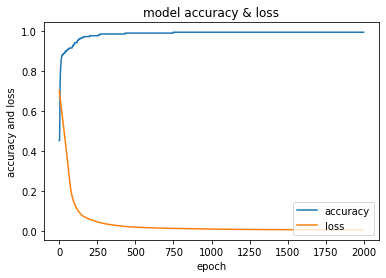

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()


In [18]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")


---------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
---------------------------------------------------------


In [19]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()


Model file:  ckd.model
2/2 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.9828

Original  : 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1

Predicted : 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1

Scores    : loss =  0.2678074836730957  acc =  0.982758641242981
---------------------------------------------------------



In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
